44100
10.65997732426304
Delta t = 2.2675736961451248e-05 seconds.
En una decima de segundo hay 4410.0


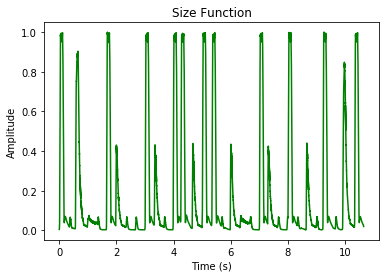

In [ ]:
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import moviepy.editor as mpy

VIDEO_SIZE = (1920, 1080)
BLACK = (0, 0, 0)
SOUND_PATH = "/home/nestor/Imágenes/Imagenes_LD/New_Prueba_Loop.wav"
LOGO_PATH = "/home/nestor/Imágenes/Imagenes_LD/square.png"
DURATION = 10.66
VID_FPS = 100

input_data = read(SOUND_PATH)
fs = input_data[0]
audio = input_data[1]
amp = audio[:, 0]
t = np.arange(amp.size) / fs
t = t[:int(fs * DURATION)]
envelope = np.abs(hilbert(amp))

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

envelope = smooth(envelope, 1000)
envelope = envelope / np.amax(envelope)
envelope = envelope[:int(fs * DURATION)]

plt.plot(t, envelope, 'g')
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.title("Size Function")
plt.show()

w = 500
logo = mpy.ImageClip(LOGO_PATH).set_position(('center', 'center')).resize(width = w)
temp_vid = mpy.CompositeVideoClip([logo], size = VIDEO_SIZE).on_color(color = BLACK, col_opacity = 1).set_duration(DURATION / 100)

for i in range(1, int(DURATION * 100)):
    w = int(500 + 200 * envelope[int(i * (fs / 100))])
    logo.set_position(('center', 'center')).resize(width = w)
    video = mpy.CompositeVideoClip([logo], size = VIDEO_SIZE).on_color(color = BLACK, col_opacity = 1).set_duration(DURATION / 100)
    final_clip = mpy.concatenate_videoclips([temp_vid, video])
    temp_vid = final_clip

final_clip.write_videofile('video_with_python.mp4', fps=100)